In [14]:
%matplotlib inline
# Dependencies and Setup
from matplotlib.legend_handler import HandlerPatch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [15]:
# Files to Load
city_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 5\\Resources\\city_data.csv"
ride_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 5\\Resources\\ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)


In [16]:
# Merge the two datasets 
combined_data_df = pd.merge(city_data_df, ride_data_df, on='city', how="left")
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [17]:
urban_data = combined_data_df[combined_data_df['type']=='Urban']
urban_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [18]:
suburban_data = combined_data_df[combined_data_df['type']=='Suburban']
suburban_data.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2018-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2018-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2018-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2018-03-15 12:09:42,31.58,2552978514662


In [19]:
rural_data = combined_data_df[combined_data_df['type']=='Rural']
rural_data.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [20]:
driver_data = combined_data_df[['driver_count']]
driver_data.head()

,driver_count
0,38
1,38
2,38
3,38
4,38


In [21]:
# Using .rename(columns={}) in order to rename columns
combined_data_df = combined_data_df.rename(columns={"type":"city_type"})
combined_data_df.head()

,city,driver_count,city_type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [22]:
# The total number of unique rides/cars
count_rides = combined_data_df["ride_id"].nunique()
count_rides

2375

In [30]:
# Using GroupBy in order to separate the data into fields according to "Urban City" values
urban_grouped_city_df = urban_data.groupby(['city','driver_count'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(urban_grouped_city_df)

# In order to be visualized, a data function must be used...
# urban_grouped_city_df.count()

In [31]:
#Average fare per urban city
Average_fare_per_urban_city = urban_grouped_city_df[["fare"]].mean().round(2)
Average_fare_per_urban_city.head()

,,fare
city,driver_count,
Amandaburgh,12,24.64
Barajasview,26,25.33
Carriemouth,52,28.31
Christopherfurt,41,24.50
Deanville,49,25.84


In [32]:
# Total No of Rides per urban city
rides_count_per_urban_city = urban_grouped_city_df[["ride_id"]].nunique()
rides_count_per_urban_city.head()

,,ride_id
city,driver_count,
Amandaburgh,12,18
Barajasview,26,22
Carriemouth,52,27
Christopherfurt,41,27
Deanville,49,19


In [34]:
# Using GroupBy in order to separate the data into fields according to "Suburban City" values
suburban_grouped_city_df = suburban_data.groupby(['city','driver_count'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(suburban_grouped_city_df)

# In order to be visualized, a data function must be used...
# suburban_grouped_city_df.count()

In [35]:
#Average fare per suburban city
Average_fare_per_suburban_city = suburban_grouped_city_df[["fare"]].mean().round(2)
Average_fare_per_suburban_city.head()

,,fare
city,driver_count,
Barronchester,11,36.42
Bethanyland,22,32.96
Brandonfort,10,35.44
Colemanland,23,30.89
Davidfurt,23,32.00


In [36]:
# Total No of Rides per suburban city
rides_count_per_suburban_city = suburban_grouped_city_df[["ride_id"]].nunique()
rides_count_per_suburban_city.head()

,,ride_id
city,driver_count,
Barronchester,11,16
Bethanyland,22,18
Brandonfort,10,19
Colemanland,23,22
Davidfurt,23,17


In [38]:
# Using GroupBy in order to separate the data into fields according to "Rural City" values
rural_grouped_city_df = rural_data.groupby(['city','driver_count'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(rural_grouped_city_df)

# In order to be visualized, a data function must be used...
# rural_grouped_city_df.count()

In [39]:
#Average fare per rural city
Average_fare_per_rural_city = rural_grouped_city_df[["fare"]].mean().round(2)
Average_fare_per_rural_city.head()

,,fare
city,driver_count,
Bradshawfurt,7,40.06
Garzaport,7,24.12
Harringtonfort,4,33.47
Jessicaport,1,36.01
Lake Jamie,4,34.36


In [40]:
# Total No of Rides per rural city
rides_count_per_rural_city = rural_grouped_city_df[["ride_id"]].nunique()
rides_count_per_rural_city.head()

,,ride_id
city,driver_count,
Bradshawfurt,7,10
Garzaport,7,3
Harringtonfort,4,6
Jessicaport,1,6
Lake Jamie,4,6


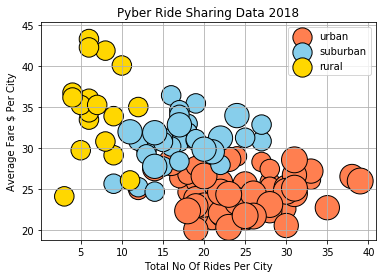

In [64]:
#define data
x1 = rides_count_per_urban_city['ride_id']
y1 = Average_fare_per_urban_city['fare']
x2 = rides_count_per_suburban_city['ride_id']
y2 = Average_fare_per_suburban_city['fare']
x3 = rides_count_per_rural_city['ride_id']
y3 = Average_fare_per_rural_city['fare']
z = driver_data

plt.ylabel('Average Fare $ Per City')
plt.xlabel('Total No Of Rides Per City')
plt.title('Pyber Ride Sharing Data 2018')


plt.scatter(x1, y1, marker='o', label='urban', s=z*10, c='coral' , alpha=1, edgecolors='black')
plt.scatter(x2, y2, marker='o', label='suburban', s=z*10, c='skyblue', alpha=1, edgecolors='black')
plt.scatter(x3, y3, marker='o', label='rural', s=z*10, c='gold', alpha=1, edgecolors='black')
# Plot legend.
plt.legend(loc="upper right", markerscale=1., scatterpoints=1, fontsize=10)
plt.grid(True)
plt.show()
